In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import *

with open('./urinate_overall_evaluation_result_0218.pkl', 'rb') as f:
    res_urinate_df = pickle.load(f)
    
with open('./defecate_overall_evaluation_result_0218.pkl', 'rb') as f:
    res_defecate_df = pickle.load(f)

In [2]:
pred_lists = res_urinate_df['Predicted Intervals'].values
annotated_lists = res_urinate_df['Annotated Intervals'].values

recalls = []
precisions = []
for pred_list, annotated_list in zip(pred_lists, annotated_lists):
    pred_list = get_merged_list_of_intervals(pred_list)
    annotated_list = get_merged_list_of_intervals(annotated_list)
    
    recalls.append(get_recall_two_list_of_intervals(true_list=annotated_list, pred_list=pred_list))
    precisions.append(get_precision_two_list_of_intervals(true_list=annotated_list, pred_list=pred_list))

In [3]:
res_urinate_df['Recall'] = recalls
res_urinate_df['Precision'] = precisions

In [ ]:
#res_urinate_df.to_csv('./urinate_overall_evaluation_result_0218.csv')

In [4]:
res_urinate_df

,Total Length,Annotated Intervals,Predicted Intervals,Annotated Weight Change,Predicted Weight Change,Recall,Precision
1802,158,"[[47.0, 60.0]]","[[47.0, 57.0], [58.0, 61.0]]",0.349833,0.346333,0.923077,0.923077
1806,97,"[[46.0, 53.0]]","[[48.0, 53.0], [50.0, 53.0]]",0.015333,0.015333,0.714286,1.000000
1808,88,"[[12.0, 34.0], [37.0, 39.0]]","[[11.0, 35.0]]",0.604500,0.615000,0.916667,0.916667
1818,55,"[[12.0, 25.0]]","[[11.96, 25.96]]",0.065833,0.032167,1.000000,0.928571
1826,65,"[[21.0, 32.0]]","[[20.96, 32.96]]",0.367000,0.367167,1.000000,0.916667
...,...,...,...,...,...,...,...
2053,50,"[[13.0, 26.0]]","[[11.919999999999998, 26.919999999999998], [44...",0.604333,84.695000,1.000000,0.722222
2054,47,"[[6.0, 19.0]]","[[5.96, 19.96]]",0.192500,0.173000,1.000000,0.928571
2055,234,"[[35.0, 39.0], [43.0, 53.0]]",[],0.149500,0.000000,0.000000,inf
2057,109,"[[27.0, 46.0], [51.0, 52.0]]","[[30.0, 44.0], [77.0, 80.0]]",0.091667,0.072000,0.700000,0.823529


In [6]:
ytrue = res_urinate_df['Annotated Weight Change']
ypred = res_urinate_df['Predicted Weight Change']
recall = res_urinate_df['Recall']
precision = res_urinate_df['Precision']

error = ypred - ytrue
error_rate = error / ytrue

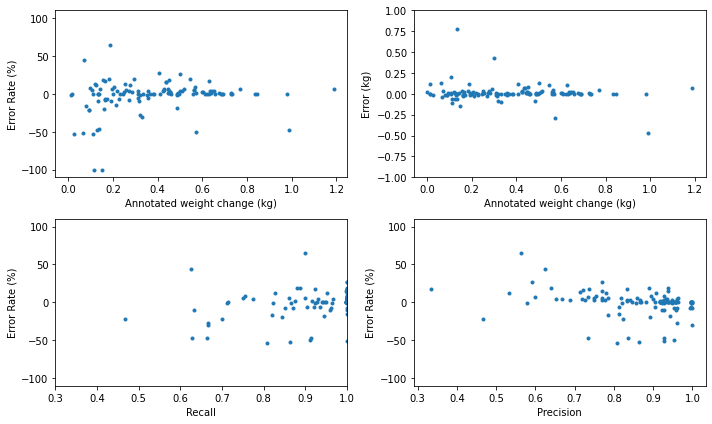

In [53]:
plt.figure(figsize = (10, 6))

plt.subplot(221)
plt.plot(ytrue, 100 * error_rate, '.')
plt.ylim(-110, 110)
plt.xlabel('Annotated weight change (kg)')
plt.ylabel('Error Rate (%)')

plt.subplot(222)
plt.plot(ytrue, error, '.')
plt.ylim(-1, 1)
plt.xlabel('Annotated weight change (kg)')
plt.ylabel('Error (kg)')


plt.subplot(223)
plt.plot(recall, 100 * error_rate, '.')
plt.ylim(-110, 110)
plt.xlim(0.3, 1)
plt.xlabel('Recall')
plt.ylabel('Error Rate (%)')

plt.subplot(224)
plt.plot(precision, 100 * error_rate, '.')
plt.ylim(-110, 110)
plt.xlabel('Precision')
plt.ylabel('Error Rate (%)')


plt.tight_layout()
pass

In [29]:
sum(error_rate > 1), sum(error_rate < -1), len(error_rate)

(9, 0, 127)

In [34]:
res_urinate_df.iloc[(error_rate > 1).values, 3:]

,Annotated Weight Change,Predicted Weight Change,Recall,Precision
1895,0.011500,0.133667,0.850000,1.000000
1923,0.109833,0.317000,1.000000,0.650000
1930,0.132667,0.913333,1.000000,0.468750
1992,0.001500,0.025667,1.000000,0.777778
1994,0.061500,0.192500,1.000000,0.324324
2022,0.204000,58.857333,0.821429,0.793103
2027,0.299000,0.725167,1.000000,0.705882
2030,0.342667,59.228333,0.777778,0.823529
2053,0.604333,84.695000,1.000000,0.722222


In [ ]:
pred_lists = res_defecate_df['Predicted Intervals'].values
annotated_lists = res_defecate_df['Annotated Intervals'].values

recalls = []
precisions = []
for pred_list, annotated_list in zip(pred_lists, annotated_lists):
    pred_list = get_merged_list_of_intervals(pred_list)
    annotated_list = get_merged_list_of_intervals(annotated_list)
    
    recalls.append(get_recall_two_list_of_intervals(true_list=annotated_list, pred_list=pred_list))
    precisions.append(get_precision_two_list_of_intervals(true_list=annotated_list, pred_list=pred_list))

res_defecate_df['Recall'] = recalls
res_defecate_df['Precision'] = precisions

res_defecate_df.to_csv('./defecate_overall_evaluation_result_0218.csv')